# SD DSL Functions

This document illustrates how to use the operators for the SD DSL. To use the operators, you need to import the `sd_functions`, in addition to importing the `Model` class.

In [1]:
from BPTK_Py import Model
from BPTK_Py import sd_functions as sd
from BPTK_Py.bptk import bptk
import numpy as np
bptk=bptk()

## DELAY Function

The DELAY function returns a delayed value of input, using a fixed lag time of delay duration, and an optional initial value initial for the delay. If you don't specify an initial value initial, DELAY assumes the value to be the initial value of input. If you specify delay duration as a variable, the DELAY function uses the initial value for its fixed lag time

Signature: `delay(model, input_function, delay_duration, initial_value)`

`input_function` must be a model element
`delay_duration` and `initial_value` must be floats or model elements.


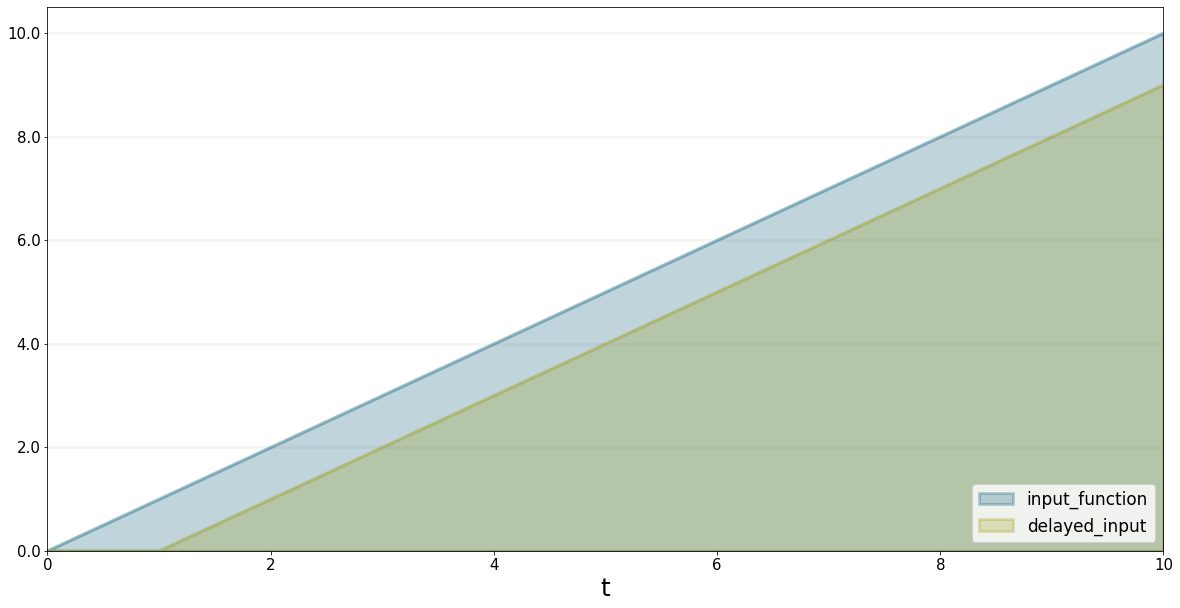

In [2]:
model = Model(starttime=0.0,stoptime=10.0,dt=0.1,name='delay')

input_function = model.converter("input_function")

input_function.equation=sd.time()

delayed_input = model.converter("delayed_input")

delayed_input.equation = sd.delay(model,input_function, 1.0)

bptk.register_model(model)
bptk.plot_scenarios(scenario_managers=["smDelay"],scenarios=["base"],equations=["input_function","delayed_input"])

## EXP Function

The `exp` function returns the exponential value of the input.

Signature: `exp(element)`

`element` can be any model element (stock, flow, converter, constant)

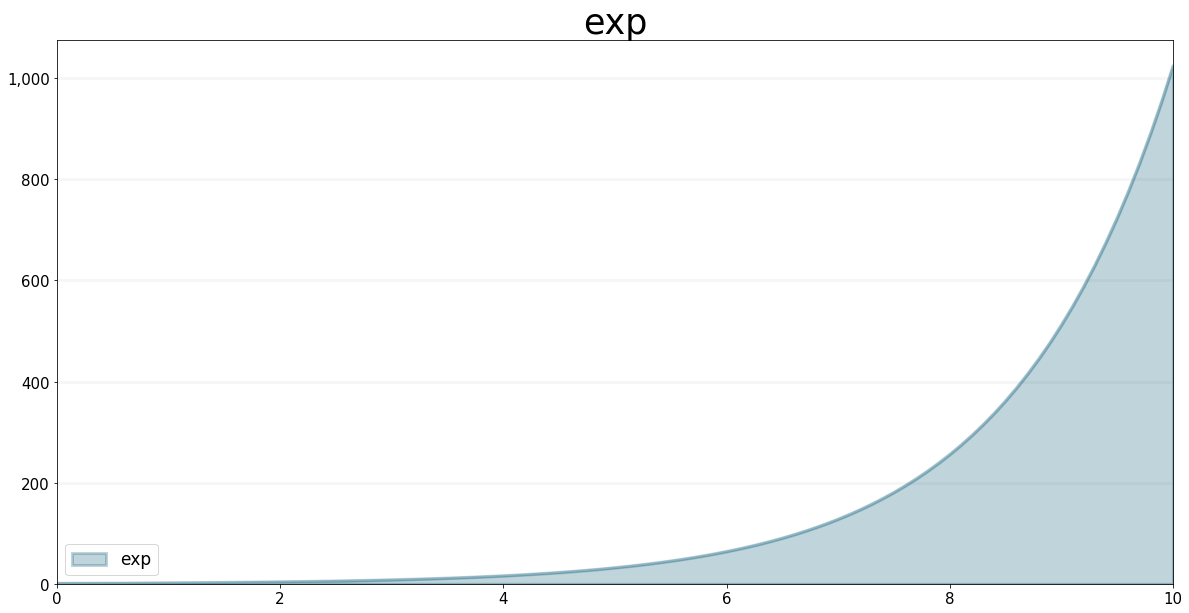

In [5]:
model = Model(starttime=0,stoptime=10,dt=0.1,name='exp')

growth_rate = model.constant("growth_rate")

growth_rate.equation=np.log(2)

exp = model.converter("exp")

exp.equation = sd.exp(growth_rate*sd.time())

exp.plot()

## MAX Function

The `max` function always chooses the larger of its two input values.

Signature: `max(element, element)`

`element` can be any model element (stock, flow, converter, constant)

In [2]:
model = Model(starttime=0.0,stoptime=10.0,dt=1.0,name='max')

In [3]:
a = model.converter("a")

In [4]:
a.equation = 5.0+sd.step(5.0, 5.0)

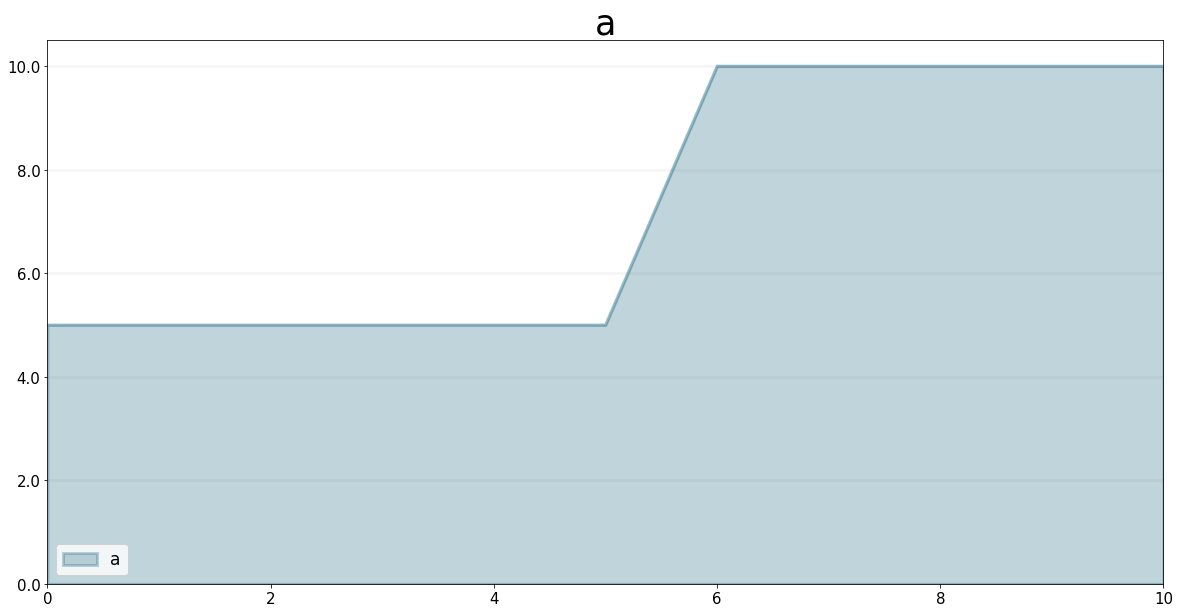

In [6]:
a.plot()

In [7]:
b = model.converter("b")

In [8]:
b.equation= 10.0 - sd.step(5.0, 5.0)

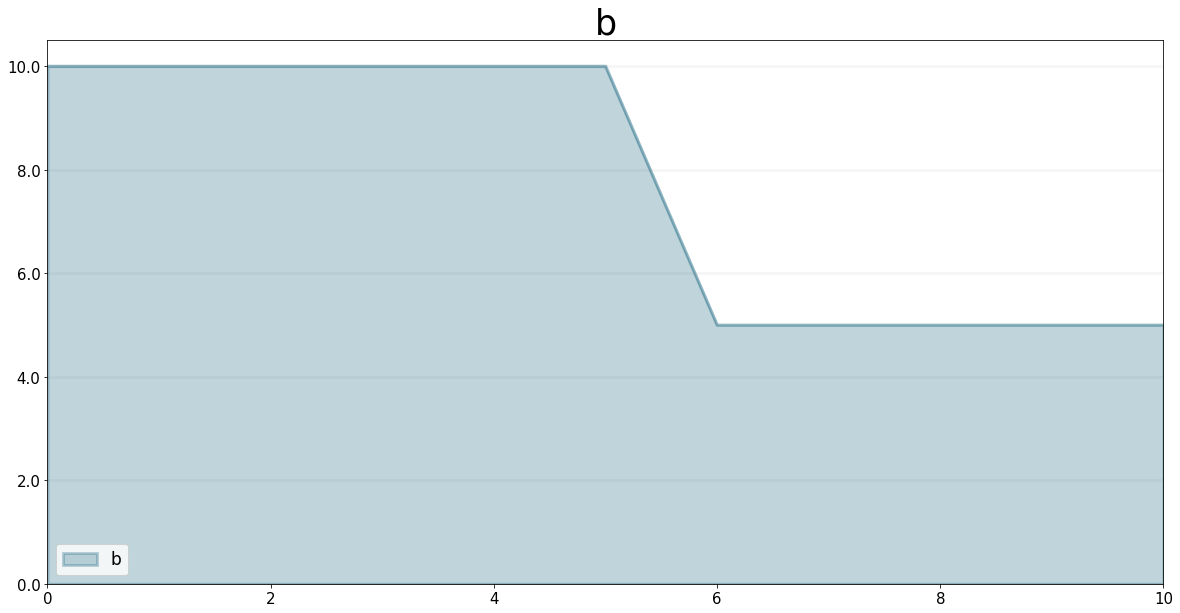

In [10]:
b.plot()

In [11]:
c = model.converter("c")

In [12]:
c.equation=sd.max(a,b)

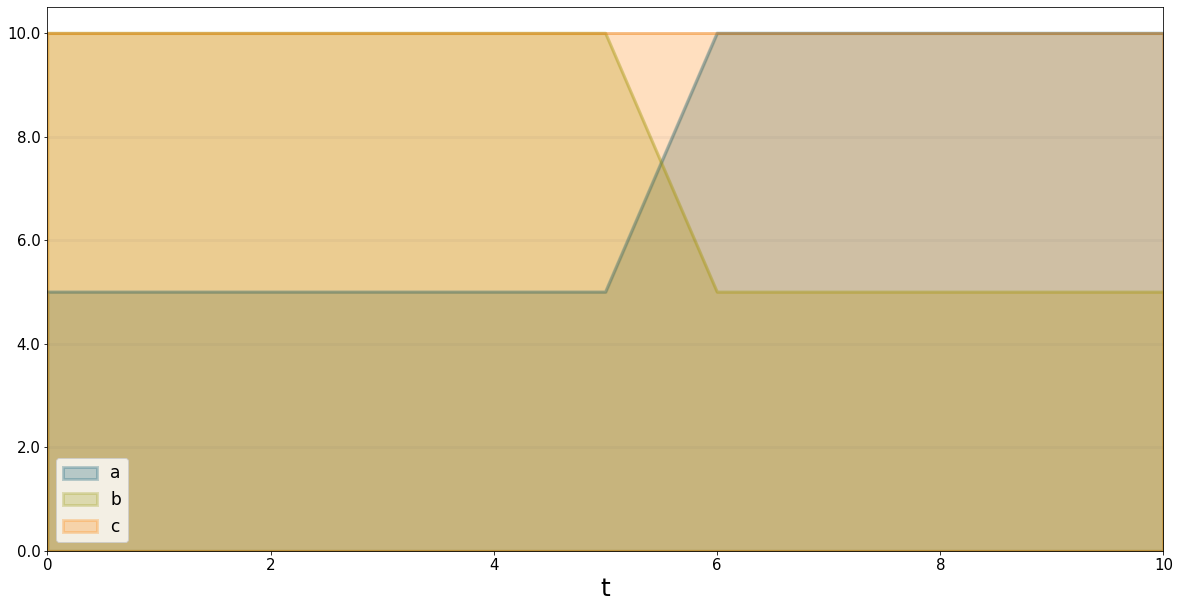

In [13]:
bptk.register_model(model)
bptk.plot_scenarios(scenario_managers=["smMax"],scenarios=["base"],equations=["a","b","c"])

## MIN Function

The `min` function always chooses the smaller of its two input values.

Signature: `min(element, element)`

`element` can be any model element (stock, flow, converter, constant)

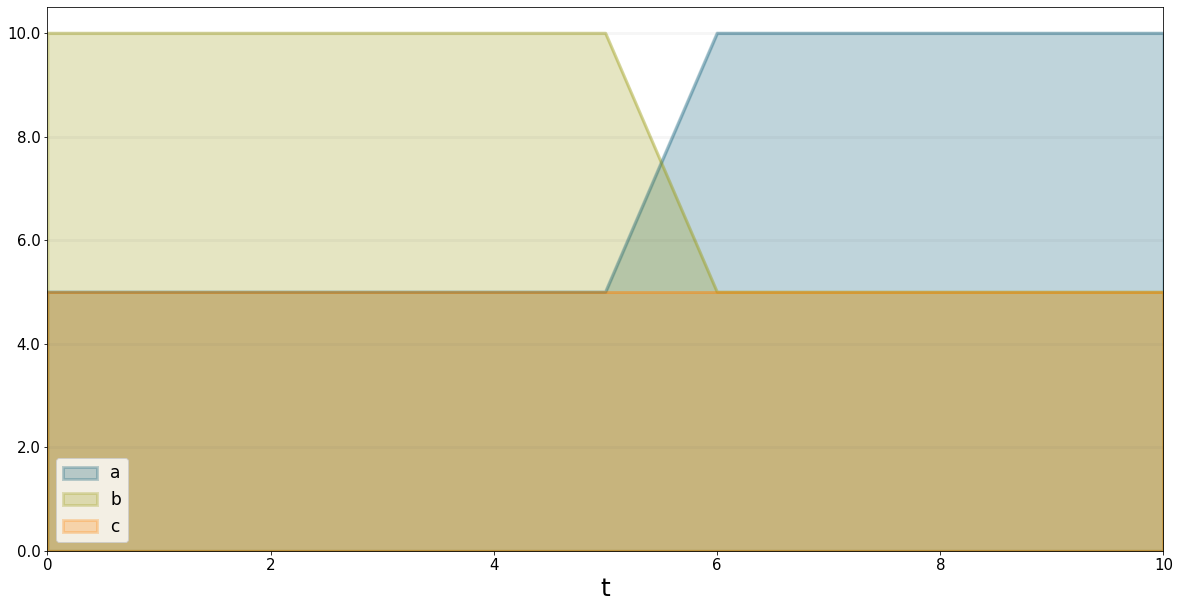

In [2]:
model = Model(starttime=0,stoptime=10,dt=1,name='min')

a = model.converter("a")

a.equation = 5.0+sd.step(5.0, 5.0)

b = model.converter("b")

b.equation= 10.0 - sd.step(5.0, 5.0)

c = model.converter("c")

c.equation = sd.min(a,b)

bptk.register_model(model)
bptk.plot_scenarios(scenario_managers=["smMin"],scenarios=["base"],equations=["a","b","c"])

## SMOOTH Function

The SMOOTH function calculates the exponential average of the input, given the input function, an initial value and an averaging time. 

Signature: `smooth(model, input_function, averaging_time, initial_value)`

`model`: The model you are writing equations for

`input_function`: any model element

`averaging_time`: any model element

`initial_value`: a floating point value or constant

The SMOOTH operator is a shorthand for the following stock and flow structure and equations:

![Stock and Flow Structure for the TREND Operator](images/in_depth_sd_dsl_operators/smooth_model.png)



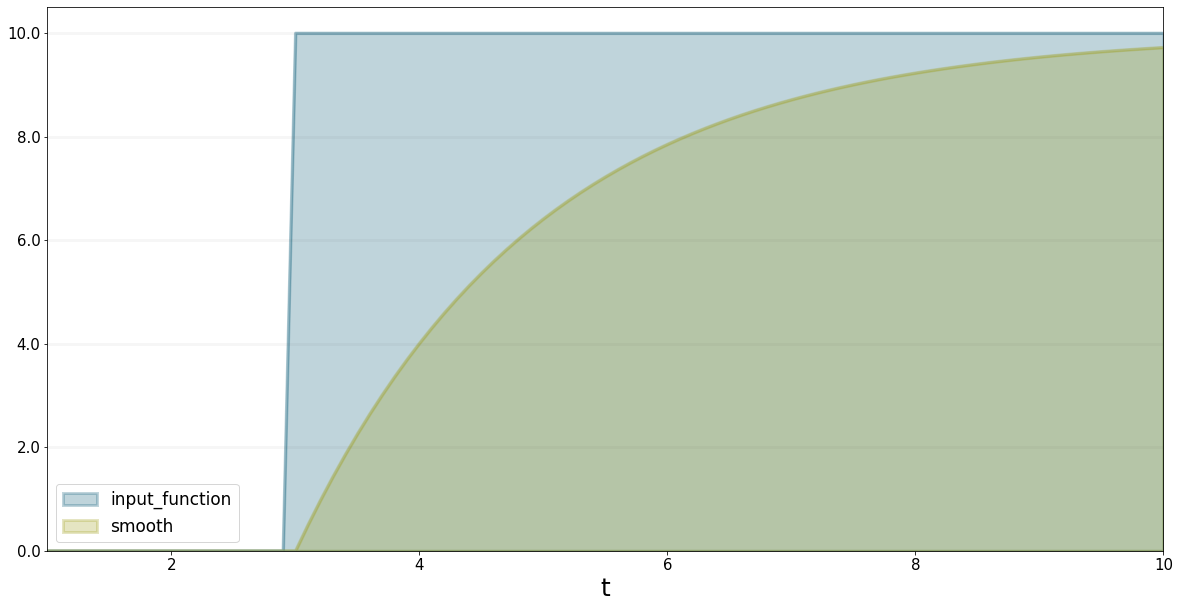

In [3]:
model = Model(starttime=1.0,stoptime=10.0,dt=0.1,name='smooth')
input_function = model.converter("input_function")
input_function.equation=sd.step(10.0,3.0)
smooth = model.converter("smooth")
smooth.equation=sd.smooth(model, input_function,2.0,0.0)
bptk.register_model(model)
bptk.plot_scenarios(scenario_managers=["smSmooth"],scenarios=["base"],equations=["input_function","smooth"])

## STEP Function

The STEP function generates a change of specified height, which occurs at a specified time. 

Signature: `step(height, timestep)`

`input_function`: any model element or a floating point number

`averaging_time`: any model element or a floating point numnber

`initial_value`: a floating point value or a constant


In [4]:
model = Model(starttime=1,stoptime=10,dt=1,name='step')

step = model.converter("step")
step.equation=sd.step(10.0,5.0)

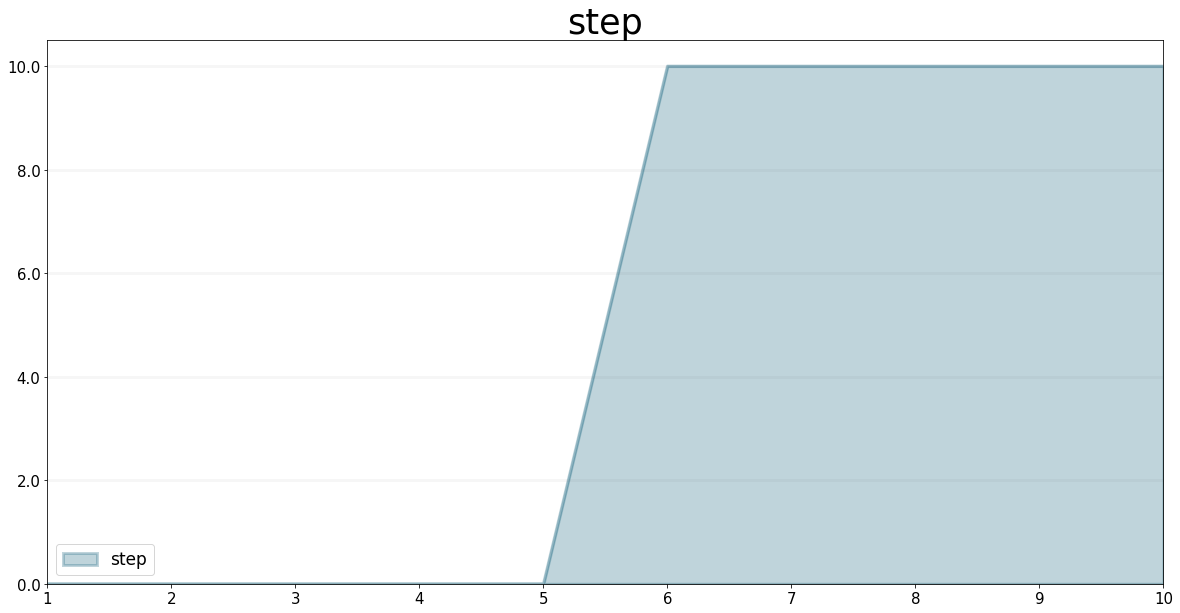

In [5]:
step.plot()

## TIME Function

The `time` function returns the current simulation time.

Signature: `time()`

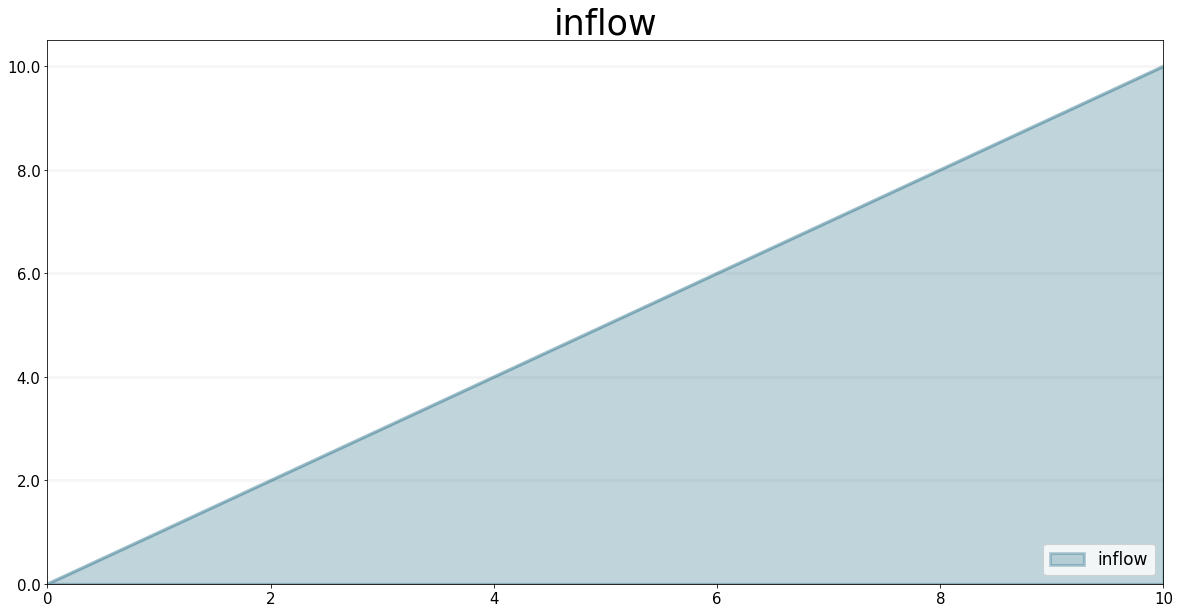

In [6]:
model = Model(starttime=0,stoptime=10,dt=1,name='time')

stock = model.stock("stock")

stock.initial_value=0.0

inflow = model.flow("inflow")

inflow.equation = sd.time()

stock.equation = inflow

inflow.plot()

## TREND Function

The TREND function calculates the trend in the input, given the input, an initial value and an averaging time. The TREND is defined to be the fractional change in input compared to the exponential average of input per averaging time. The TREND function thus estimates the growth rate of is input function.


Signature: `trend(model, input_function, averaging_time, initial_value)`

`model`: The model you are writing equations for

`input_function`: any model element

`averaging_time`: any model element

`initial_value`: a floating point value or constant

The TREND operator is a shorthand for the following stock and flow structure and equations:

![Stock and Flow Structure for the TREND Operator](images/in_depth_sd_dsl_operators/trend_model.png)



In [7]:
model = Model(starttime=1,stoptime=10,dt=0.01,name='trend')

growth_rate = model.constant("growth_rate")

growth_rate.equation=np.log(2)

input_function = model.converter("input_function")

input_function.equation = sd.exp(growth_rate*sd.time())


trend = model.converter("trend")

trend.equation = sd.trend(model,input_function,1.0,2/(1+np.log(2))) 

As an example, we set up a small model that has an input function that doubles every timestep - i.e the exponential growth rate is log 2 ≈ 0.69 and then apply the trend function to estimate the growth rate.

Here is a plot of the growth rate, which is constant:

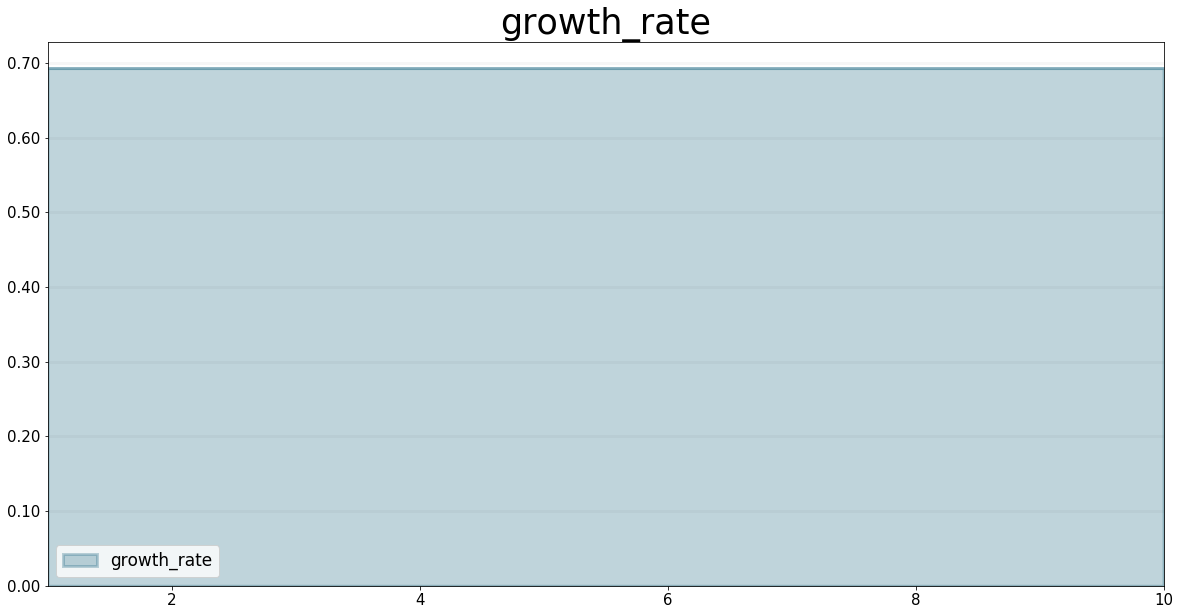

In [8]:
growth_rate.plot()

This gives an input function which doubles in value on every timestep:

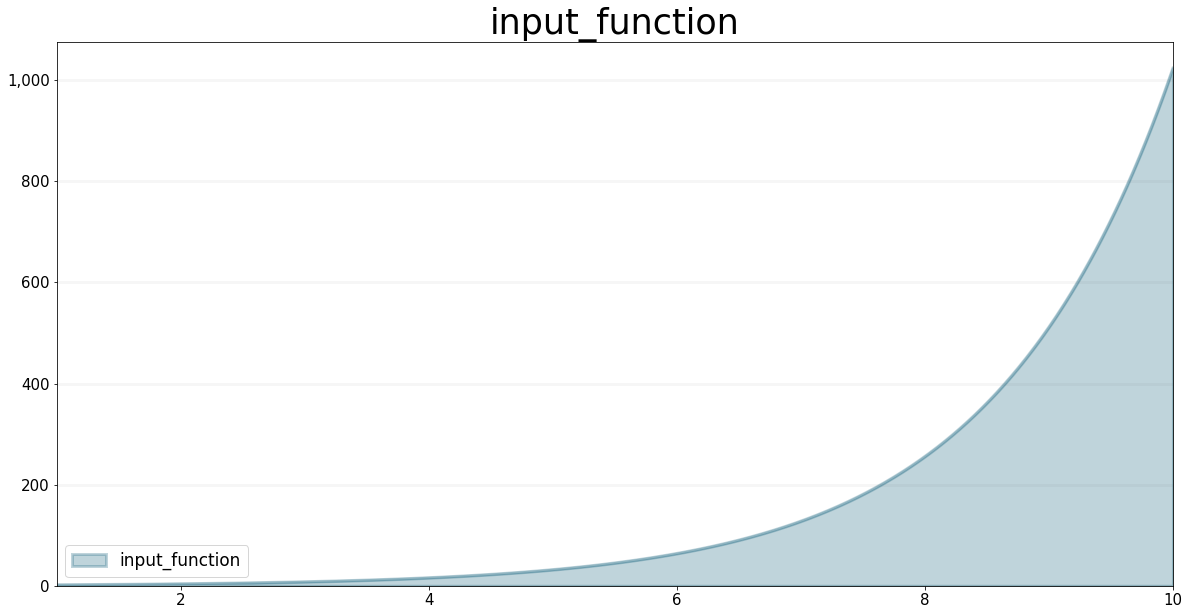

In [9]:
input_function.plot()

As expexted, the plot of the trend function converges to the input growth rate:

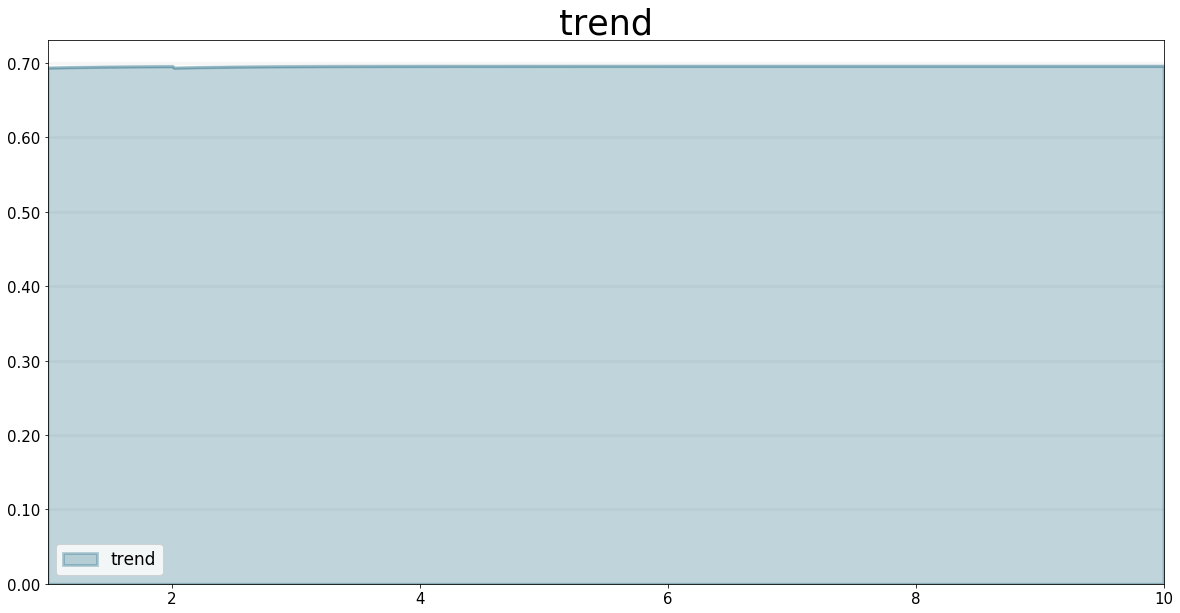

In [10]:
trend.plot()